In [3]:
# Standard imports 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import csv

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read training and testing files as DataFrame
train_file = pd.read_csv('train.csv', dtype={"Age": np.float64},)
test_file = pd.read_csv('test.csv', dtype={"Age": np.float64},)
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [5]:
def fill_missing_values(data):
    data["Age"] = data["Age"].fillna(data["Age"].median())
    
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    
    data["Embarked"] = data["Embarked"].fillna("S")
    
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "Q", "Embarked"] = 1
    data.loc[data["Embarked"] == "C", "Embarked"] = 2

    data["Fare"] = data["Fare"].fillna(data["Fare"].median())
    
    return data

In [6]:
train_data=fill_missing_values(train_file)
test_data=fill_missing_values(test_file)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


# Predcition using 10 fold cross validation on training data

Algorithms used:
1. Logictic Regression
2. Random Forest
3. Decision Tree
4. K-Nearest Neighbor
5. Gaussian Naive Bayes
6. Ada Boosting
7. Gradient Boosting
8. Linear Discriminative Analysis
9. Quadratic Discriminative Analysis

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = LogisticRegression(random_state=1)
cross_validation_accuracy_log = cross_validation.cross_val_score(alg,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_log.mean())

0.795800987402


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

alg1 = RandomForestClassifier(random_state=1,n_estimators=150,min_samples_split=4,min_samples_leaf=2)
cross_validation_accuracy_rfc=cross_validation.cross_val_score(alg1,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_rfc.mean())

0.829509420043


# Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

alg2 = DecisionTreeClassifier(random_state=1,min_samples_split=4,min_samples_leaf=2)
cross_validation_accuracy_dt=cross_validation.cross_val_score(alg2,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_dt.mean())

0.799297752809


# K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

alg3 = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto')
cross_validation_accuracy_knn=cross_validation.cross_val_score(alg3,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_knn.mean())


0.711742424242


# Gaussian Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

alg4=GaussianNB()
cross_validation_accuracy_nb=cross_validation.cross_val_score(alg4,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_nb.mean())

0.785750766088


# Ada Boost 

In [12]:
from sklearn.ensemble import AdaBoostClassifier

alg5=AdaBoostClassifier(random_state=1)
cross_validation_accuracy_ada=cross_validation.cross_val_score(alg5,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_ada.mean())

0.811568777664


# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

alg6=GradientBoostingClassifier(min_samples_split=4,min_samples_leaf=2,random_state=1)
cross_validation_accuracy_grad=cross_validation.cross_val_score(alg6,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_grad.mean())

0.830595562365


# Linear Discriminative Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

alg7=LinearDiscriminantAnalysis()
cross_validation_accuracy_lda=cross_validation.cross_val_score(alg7,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_lda.mean())

0.792379412099


# Quadratic Discriminative Analysis

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

alg8=QuadraticDiscriminantAnalysis()
cross_validation_accuracy_qda=cross_validation.cross_val_score(alg8,train_data[predictors],train_data["Survived"],cv=10)

print(cross_validation_accuracy_qda.mean())

0.800283168766


# Model fitting on training data and predicting the survival of the passengers in the testing data and writing it to a csv file

Algorithms used:
1. Logictic Regression
2. Random Forest
3. Decision Tree
4. K-Nearest Neighbor
5. Gaussian Naive Bayes
6. Ada Boosting
7. Gradient Boosting
8. Linear Discriminative Analysis
9. Quadratic Discriminative Analysis

# Logistic Regression

In [16]:
fit = alg.fit(train_data[predictors],train_data["Survived"])

predictions = alg.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_logistic_regression.csv",index=False)

# Random forest

In [17]:
fit = alg1.fit(train_data[predictors],train_data["Survived"])

predictons_rfc=alg1.predict(test_data[predictors])

output_rfc=pd.DataFrame({
        "PassengerId":test_data["PassengerId"],
        "Survived":predictons_rfc
    })
output.to_csv("output_random_forest.csv",index=False)

# Decision Tree

In [18]:
fit = alg2.fit(train_data[predictors],train_data["Survived"])

predictons_dt=alg2.predict(test_data[predictors])

output_dt=pd.DataFrame({
        "PassengerId":test_data["PassengerId"],
        "Survived":predictons_rfc
    })
output.to_csv("output_decision_tree.csv",index=False)

# K-Nearest Neighbor

In [19]:
fit = alg3.fit(train_data[predictors],train_data["Survived"])

predictons_knn=alg3.predict(test_data[predictors])

output_knn=pd.DataFrame({
        "PassengerId":test_data["PassengerId"],
        "Survived":predictons_rfc
    })
output.to_csv("output_nearest_neighbor.csv",index=False)

# Gaussian Naive Bayes

In [20]:
fit = alg4.fit(train_data[predictors],train_data["Survived"])

predictions = alg4.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_naive_bayes.csv",index=False)

# Ada Boosting

In [21]:
fit = alg5.fit(train_data[predictors],train_data["Survived"])

predictions = alg5.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_ada_boosting.csv",index=False)

# Gradient Boosting

In [22]:
fit = alg6.fit(train_data[predictors],train_data["Survived"])

predictions = alg6.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_gradient_boosting.csv",index=False)

# Linear Discriminative Analysis

In [23]:
fit = alg7.fit(train_data[predictors],train_data["Survived"])

predictions = alg7.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_Linear_discriminative_analysis.csv",index=False)

# Quadratic Discriminative Analysis

In [24]:
fit = alg8.fit(train_data[predictors],train_data["Survived"])

predictions = alg8.predict(test_data[predictors])

output = pd.DataFrame({
        "PassengerID": test_data["PassengerId"],
        "Survived": predictions
    })
output.to_csv("output_quadratic_discriminative_analysis.csv",index=False)

# Visualizing Accuracy

In [25]:
accuracy_cols=["Classifier","Accuracy"]
accuracy=pd.DataFrame(columns=accuracy_cols)

accuracy_entry = pd.DataFrame([["Logistic Regression", cross_validation_accuracy_log.mean()*100],
                 ["Random Forest", cross_validation_accuracy_rfc.mean()*100],
                 ["Decision Tree", cross_validation_accuracy_dt.mean()*100],
                 ["K-Nearest Neighbor", cross_validation_accuracy_knn.mean()*100],
                 ["Gaussian Naive Bayes", cross_validation_accuracy_nb.mean()*100],
                 ["Ada Boosting", cross_validation_accuracy_ada.mean()*100],
                 ["Gradient Boosting", cross_validation_accuracy_grad.mean()*100],
                 ["Linear Discriminative Analysis", cross_validation_accuracy_lda.mean()*100],
                 ["Quadratic Discriminative Anaysis", cross_validation_accuracy_qda.mean()*100]],
                 columns=accuracy_cols)
accuracy=accuracy.append(accuracy_entry)
    

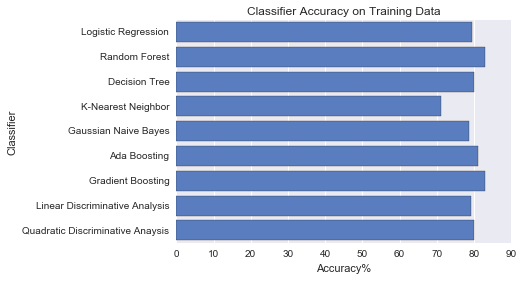

In [26]:
sns.set_color_codes("muted")
sns.barplot(x="Accuracy",y="Classifier",data=accuracy,color="b")

plt.xlabel("Accuracy%")
plt.title("Classifier Accuracy on Training Data")
plt.show()